In [157]:
#### So we need input data first which we hv in nii

import os
import natsort
import numpy as np
import nibabel as nib
from numpy import savez, load

import multiprocessing
from multiprocessing import Pool

In [9]:
TRAIN_DATASET_PATH = "../test_files/image_3d/"

test_image_flair=nib.load(TRAIN_DATASET_PATH +'testimg_3d_flair.nii').get_fdata()
test_image_t1=nib.load(TRAIN_DATASET_PATH +'testimg_3d_t1.nii').get_fdata()
test_image_t1ce=nib.load(TRAIN_DATASET_PATH +'testimg_3d_t1ce.nii').get_fdata()
test_image_seg=nib.load(TRAIN_DATASET_PATH +'testimg_3d_seg.nii').get_fdata()
test_image_t2=nib.load(TRAIN_DATASET_PATH +'testimg_3d_t2.nii').get_fdata()

In [10]:
print(test_image_flair.shape)
print(test_image_flair.dtype)

(240, 240, 155)
float64


In [264]:
def findminmaxidx(seg, num):
    front = 0
    end = 155
    for i in range(155):
        if np.sum(seg[:,:,i]>0) > num:
            front = i
            break

    for i in range(155):
        if np.sum(seg[:,:,154-i]>0) > num:
            end = 154 - i
            break
    return range(front, end)

def singledir(path):
    
    size = 200
    imgList = natsort.natsorted(os.listdir(path))
    # auto detect the names
    flair =  nib.load(path + "/" + imgList[0]).get_fdata().astype(np.float32)
    seg = nib.load(path + "/" +imgList[1]).get_fdata().astype(np.float32)
    t1 =  nib.load(path + "/" +imgList[2]).get_fdata().astype(np.float32)
    t1ce =  nib.load(path + "/" + imgList[3]).get_fdata().astype(np.float32)
    t2 =  nib.load(path + "/" +imgList[4]).get_fdata().astype(np.float32)
    res = findminmaxidx(seg, size)
    
    
    flair = np.rollaxis(flair, 2,1).reshape(155,240, 240, 1)[res]
    seg = np.rollaxis(seg, 2,1).reshape(155,240, 240, 1)[res]
    t1 = np.rollaxis(t1, 2,1).reshape(155,240, 240, 1)[res]
    t1ce = np.rollaxis(t1ce, 2,1).reshape(155,240, 240, 1)[res]
    t2 = np.rollaxis(t2, 2,1).reshape(155,240, 240, 1)[res]
    return  t1, t1ce, flair, t2, seg
    

In [269]:
def createdataset(PATH, OUTPUT_PATH, numpatients=1, npzmode=True):
    dirList = natsort.natsorted(os.listdir(PATH))[0:numpatients]
    dirPaths = [os.path.join(PATH + i) for i in dirList]
    
    IMG_WIDTH = 240
    IMG_HEIGHT = 240 
    DIMS = 1
    
    t1 = np.zeros((0,IMG_WIDTH, IMG_HEIGHT, DIMS))
    t1ce = np.zeros((0,IMG_WIDTH, IMG_HEIGHT, DIMS))
    flair = np.zeros((0,IMG_WIDTH, IMG_HEIGHT, DIMS))
    t2= np.zeros((0,IMG_WIDTH, IMG_HEIGHT, DIMS))
    seg = np.zeros((0,IMG_WIDTH, IMG_HEIGHT, DIMS))
    
    try:
        # Setup multiprocessing pool
        cpu_count = multiprocessing.cpu_count()
        pool = multiprocessing.Pool(processes = cpu_count)  
        for data  in pool.map(singledir, dirPaths):
            t1 = np.concatenate((t1,data[0]))
            t1ce = np.concatenate((t1ce,data[1]))
            flair = np.concatenate((flair,data[2]))
            t2 = np.concatenate((t2,data[3]))
            seg = np.concatenate((seg,data[4]))

    finally:
        pool.close()
        pool.join()

    # make sure to create a directory if it doesn't exist, errors out here
    if npzmode == True:
        np.savez(OUTPUT_PATH + "t1.npz", t1)
        np.savez(OUTPUT_PATH + "t1ce.npz", t1ce)
        np.savez(OUTPUT_PATH + "flair.npz", flair)
        np.savez(OUTPUT_PATH + "t2.npz", t2)
        np.savez(OUTPUT_PATH + "seg.npz", seg)
        return 0 
    else:
        return {"t1": t1,"t1ce": t1ce,"flair": flair, "t2": t2, "seg": seg}
    
    return -1
    
PATH = "../test_files/dataset/"
OUTPUT_PATH = "../test_files/output/"
d = createdataset(PATH, OUTPUT_PATH, 2, True)

['patient_1', 'patient_2']


In [161]:
PATH="../test_files/image_3d/"
imgList = natsort.natsorted(os.listdir(PATH))

In [162]:
info = [(name,index) for name,index in enumerate(imgList)]
print(info)

[(0, 'testimg_3d_flair.nii'), (1, 'testimg_3d_seg.nii'), (2, 'testimg_3d_t1.nii'), (3, 'testimg_3d_t1ce.nii'), (4, 'testimg_3d_t2.nii')]


In [163]:
def processimg(info):
    img = nib.load(TRAIN_DATASET_PATH + info[1]).get_fdata()
    return info[0], img[:,:,0]

try:
    # Setup multiprocessing pool
    cpu_count = multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes = cpu_count)  
    for idx,img  in pool.map(processimg, info):
        print(img.shape)

finally:
    pool.close()
    pool.join()


(240, 240)
(240, 240)
(240, 240)
(240, 240)
(240, 240)


In [76]:
info[4]

(4, 'testimg_3d_seg.nii')

In [252]:

res = singledir("../test_files/image_3d/")


(76, 240, 240, 1)

In [263]:
res[3].dtype

dtype('float64')

In [216]:
d = np.reshape(res[0], (76, 240,240))

In [229]:
d[-1;:,:].shape;

SyntaxError: invalid syntax (1212803653.py, line 1)

In [234]:
np.rollaxis(d,2,1).shape

(76, 240, 240)

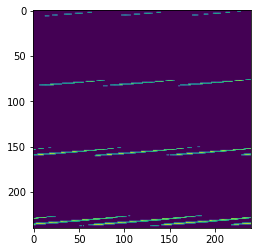

In [217]:
plt.imshow(d[16])

In [81]:
seg = nib.load(TRAIN_DATASET_PATH + info[4][1]).get_fdata()

In [178]:
a = np.zeros((100,256,256,1))
b = np.zeros((150,256,256,1))

In [179]:
np.concatenate((a,b)).shape

(250, 256, 256, 1)

In [176]:
?np.hstack

In [180]:
a = np.zeros((00,256,256,1))

In [183]:
np.concatenate((a,b)).shape

(150, 256, 256, 1)